## In depth data exploration

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
df = pd.read_csv('Amazon.csv')
df_2021= pd.read_csv('Amazon 2021.csv')

In [2]:
print(df.shape)
print(df_2021.shape)


(976, 24)
(498, 24)


In [3]:
#Changing the date column type

df["Date"]=df["Date"].astype('datetime64[ns]')
df= df.sort_values(by='Date')

df_2021["Date"]=df_2021["Date"].astype('datetime64[ns]')
df_2021= df_2021.sort_values(by='Date')

In [4]:
#Concatenate the data 
df_concat = pd.concat([df, 
                df_2021
                 ], ignore_index=True)
df_concat.shape

(1474, 24)

model_campaign=[]
geography_campaign=[]
objective=[]

for order in df['Order']:
    if 'Awareness_EQA+EQB_' in order:
        model_campaign.append('Awareness_EQA+EQB')
    elif "_C Class Launch_" in order:
        model_campaign.append('C_Class_Launch')
    elif "_EQS June_" in order:
        model_campaign.append("_EQS June_")
    elif "_EQS 53 AMG" in order:
        model_campaign.append("EQS_53_AMG")
    else:
        model_campaign.append(None)
        

for order in df['Order']:
    if 'DXB' in order:
        geography_campaign.append('Dubai')
    elif 'KSA' in order or 'SAU' in order:
        geography_campaign.append('KSA')
    else:
        geography_campaign.append(None)
    

for item in df['Line item']:
    if 'AWRN' in item:
        objective.append('Awareness')
    elif "CONS" in item:
        objective.append('Consideration')
    elif 'PRCH' in item or 'Decision' in item:
        objective.append('Decision')
    else:
        objective.append(None)

df['model_campaign']=model_campaign
df['geography_campaign']=geography_campaign
df['objective']=objective


In [5]:
#Convert the currency to dollars (used conversion rate date : Jul 13th)

df['Total cost'] = df['Total cost'] / 3.67

df_concat['Total cost'] = df_concat['Total cost'] / 3.67

In [6]:
#Keep only relevant columns for data exploration

df_expl= df.drop(columns=['Advertiser', 'Order', 'Order ID', 'Line item', 'Line item ID', 'Creative', 'Creative ID', 'Creative type', 'Daily reach', 'Supply cost', 'Video started', 'Video start', 'Video first quartile', 'Video midpoint', 'Video third quartile', 'Video complete', 'Video click', 'Advertiser ID', 'Order currency'])
df_concat_expl= df_concat.drop(columns=['Advertiser', 'Order', 'Order ID', 'Line item', 'Line item ID', 'Creative', 'Creative ID', 'Creative type', 'Daily reach', 'Supply cost', 'Video started', 'Video start', 'Video first quartile', 'Video midpoint', 'Video third quartile', 'Video complete', 'Video click', 'Advertiser ID', 'Order currency'])

mask_1 = df_concat_expl['Impressions'] < df_concat_expl['Gross click-throughs']
df_concat_expl= df_concat_expl[~mask_1]
mask_2 = (df_concat_expl['Total cost'] == 0) & (df_concat_expl['Impressions'] > 0)
df_concat_expl= df_concat_expl[~mask_2]

df_concat_expl.reset_index(drop=True, inplace=True)

In [7]:
df_expl

,Date,Total cost,Impressions,Lead,Gross click-throughs
0,2022-04-03,19.166362,3670,0,27
58,2022-04-03,21.434117,3022,0,34
116,2022-04-03,29.580728,1292,0,3
172,2022-04-03,22.049172,4275,0,25
29,2022-04-03,20.897978,4030,0,22
...,...,...,...,...,...
881,2022-12-09,0.011090,6,0,0
890,2022-12-09,0.028564,5,0,0
863,2022-12-09,0.101087,9,0,0
957,2022-12-09,0.023929,17,0,0


In [8]:
df_concat_expl

,Date,Total cost,Impressions,Lead,Gross click-throughs
0,2022-04-03,19.166362,3670,0,27
1,2022-04-03,21.434117,3022,0,34
2,2022-04-03,29.580728,1292,0,3
3,2022-04-03,22.049172,4275,0,25
4,2022-04-03,20.897978,4030,0,22
...,...,...,...,...,...
1468,2021-12-28,9.388447,1715,0,44
1469,2021-12-28,106.324196,20465,0,24
1470,2021-12-29,75.286431,16659,0,20
1471,2021-12-29,7.133106,1458,0,41


## Simple plotting

1. Spend analysis

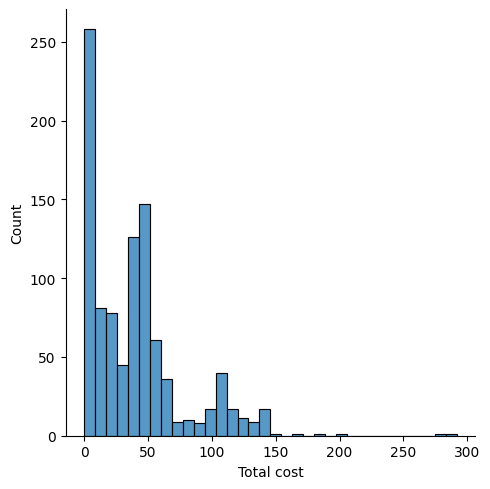

In [9]:
sns.displot(x=df_expl['Total cost'])

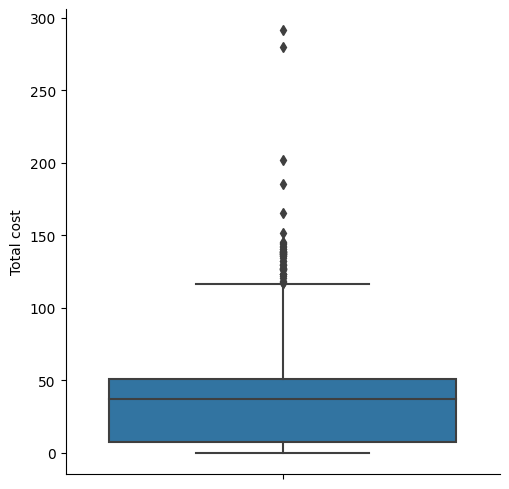

In [10]:
sns.catplot(y='Total cost', data= df_expl, kind='box')

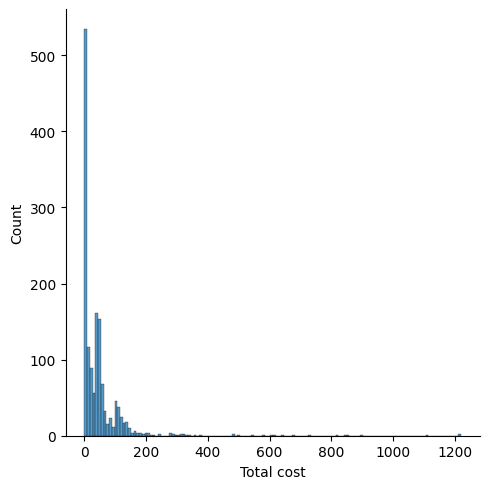

In [11]:
sns.displot(x=df_concat_expl['Total cost'])

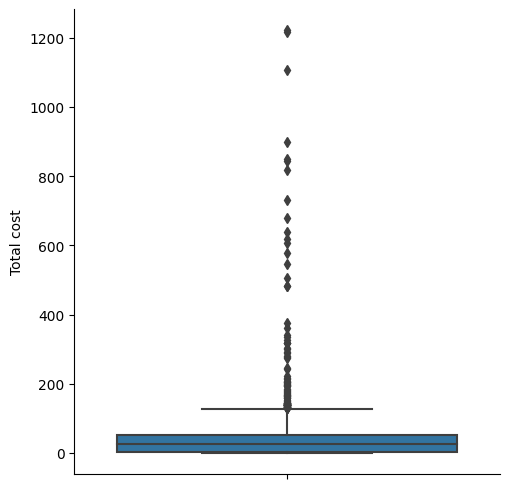

In [12]:
sns.catplot(y='Total cost', data= df_concat_expl, kind='box')

In [13]:
df_concat_expl['Total cost'].describe()

count    1473.000000
mean       48.090554
std        94.962745
min         0.000000
25%         2.218610
50%        26.336894
75%        52.630120
max      1221.323052
Name: Total cost, dtype: float64

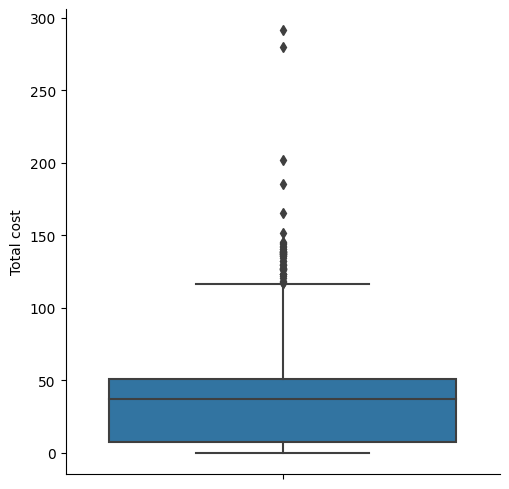

In [14]:
sns.catplot(y='Total cost', data= df_expl, kind='box')

1.1. Spending by geographical region

df_expl['geography_campaign'].value_counts()

colours=['red','blue']
sns.displot(x=df_expl['Total cost'], col=df_expl['geography_campaign'], hue=df_expl['geography_campaign'], palette=colours)

sns.catplot(x='geography_campaign', y='Total cost', data= df_expl, kind='box')

1.2. Spending by campaign goal

df_expl['objective'].value_counts()

colours=['red','blue', 'green']
sns.displot(x=df_expl['Total cost'], col=df_expl['objective'], hue=df_expl['objective'], palette=colours)

sns.catplot(x='objective', y='Total cost', data= df_expl, kind='box')

1.3. Spending by campaign model

df_expl['model_campaign'].value_counts()

colours=['red','blue', 'green', 'purple']
sns.displot(x=df_expl['Total cost'], col=df_expl['model_campaign'], hue=df_expl['model_campaign'], palette=colours)

sns.catplot(x='model_campaign', y='Total cost', data= df_expl, kind='box')

## 2. Impressions 

2.1. Only 2022

In [15]:
df_expl['Impressions'].describe()

count       976.000000
mean      11901.237705
std       21641.919061
min           0.000000
25%         489.000000
50%        3579.000000
75%       14372.750000
max      145101.000000
Name: Impressions, dtype: float64

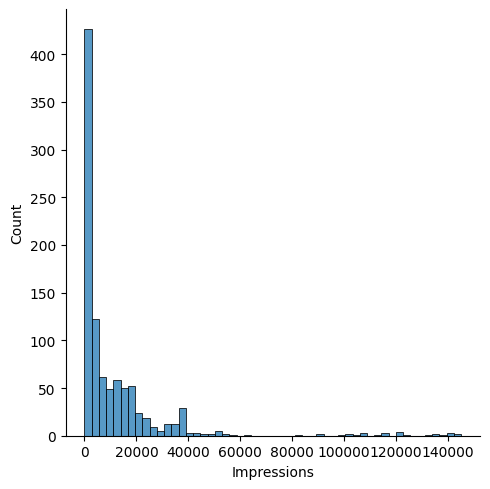

In [16]:
sns.displot(x=df_expl['Impressions'])

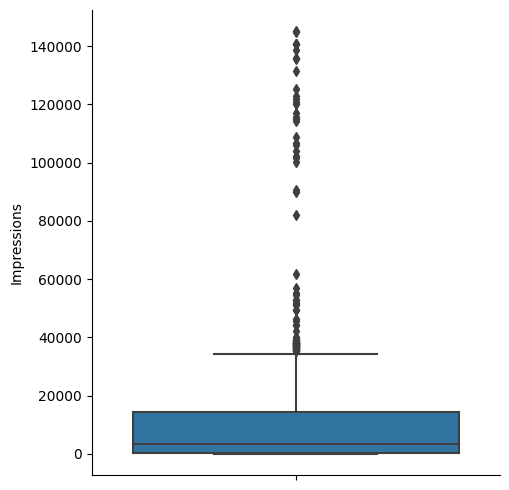

In [17]:
sns.catplot(y='Impressions', data= df_expl, kind='box')

2.2. 2021-2022

<function matplotlib.pyplot.show(close=None, block=None)>

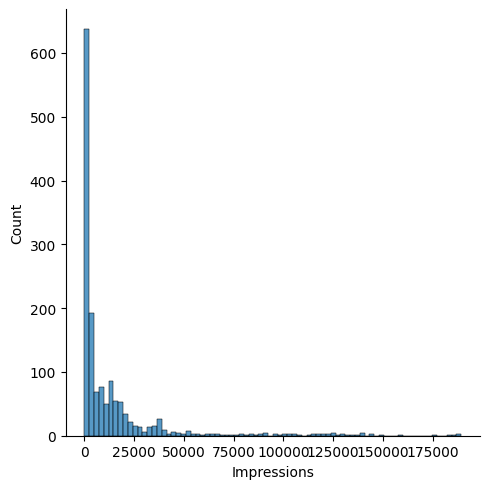

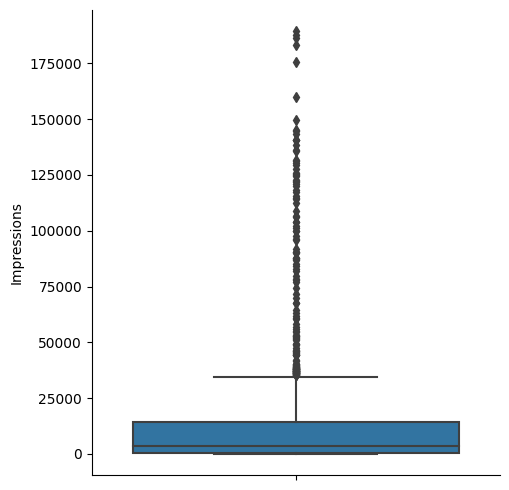

In [18]:
sns.displot(x=df_concat_expl['Impressions'])
plt.show

sns.catplot(y='Impressions', data= df_concat_expl, kind='box')
plt.show

In [19]:
df_concat_expl['Impressions'].describe()

count      1473.000000
mean      13294.682281
std       25900.027362
min           0.000000
25%         411.000000
50%        3418.000000
75%       14360.000000
max      189413.000000
Name: Impressions, dtype: float64

2.1. Impressions according to geography

colours=['red','blue']
sns.displot(x=df_expl['Impressions'],col=df_expl['geography_campaign'], hue=df_expl['geography_campaign'], palette=colours)

sns.catplot(x='geography_campaign', y='Impressions', data= df_expl, kind='box')

2.2. Impressions According to Campaign Objective 

colours=['red','blue', 'green']
sns.displot(x=df_expl['Impressions'],col=df_expl['objective'], hue=df_expl['objective'], palette=colours)

sns.catplot(x='objective', y='Impressions', data= df_expl, kind='box')

2.3. Impressions according to campaign_model

colours=['red','blue', 'green', 'yellow']
sns.displot(x=df_expl['Impressions'],col=df_expl['model_campaign'], hue=df_expl['model_campaign'], palette=colours)

sns.catplot(x='model_campaign', y='Impressions', data= df_expl, kind='box')
plt.xticks(rotation=45)

## 3. Gross click-throughs

3.1 Only 2022

In [20]:
df_expl['Gross click-throughs'].describe()

count    976.000000
mean      29.736680
std       45.558993
min        0.000000
25%        2.000000
50%       13.000000
75%       36.250000
max      437.000000
Name: Gross click-throughs, dtype: float64

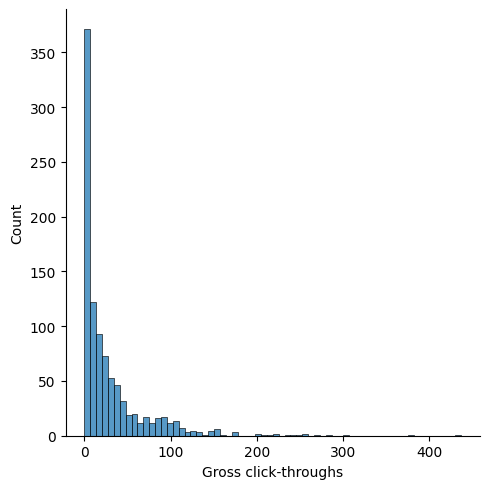

In [21]:
sns.displot(x=df_expl['Gross click-throughs'])

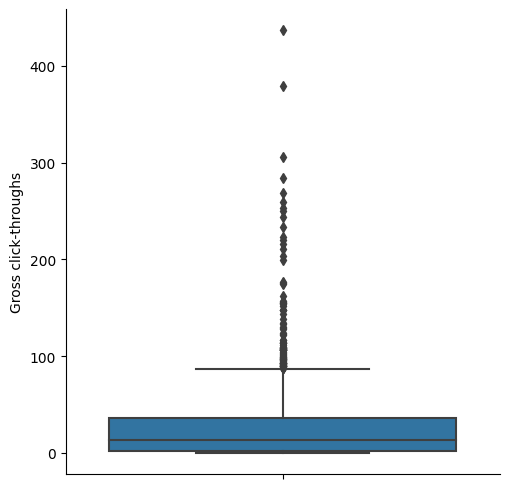

In [22]:
sns.catplot(y='Gross click-throughs', data= df_expl, kind='box')

In [23]:
df_concat_expl['Gross click-throughs'].describe()

count    1473.000000
mean       37.122200
std        76.041054
min         0.000000
25%         1.000000
50%        10.000000
75%        39.000000
max      1246.000000
Name: Gross click-throughs, dtype: float64

3.2. 2021 & 2022

<function matplotlib.pyplot.show(close=None, block=None)>

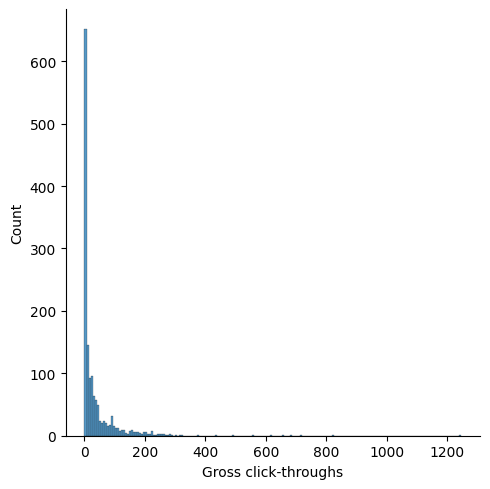

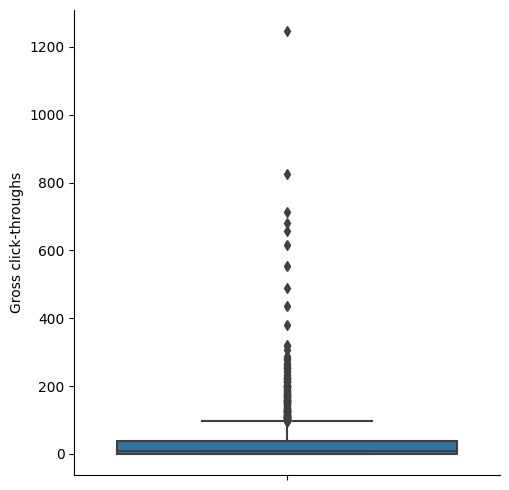

In [24]:
sns.displot(x=df_concat_expl['Gross click-throughs'])
plt.show

sns.catplot(y='Gross click-throughs', data= df_concat_expl, kind='box')
plt.show


colours=['red','blue']
sns.displot(x=df_expl['Video click'],col=df_expl['geography_campaign'], hue=df_expl['geography_campaign'], palette=colours)

sns.catplot(x='geography_campaign', y='Video click', data= df_expl, kind='box')

3.2 Video clicks vs objective

colours=['red','blue', 'green']
sns.displot(x=df_expl['Video click'],col=df_expl['objective'], hue=df_expl['objective'], palette=colours)

sns.catplot(x='objective', y='Video click', data= df_expl, kind='box')

3.3. Video clicks vs model 

colours=['red','blue', 'green', 'yellow']
sns.displot(x=df_expl['Video click'],col=df_expl['model_campaign'], hue=df_expl['model_campaign'], palette=colours)

sns.catplot(x='model_campaign', y='Video click', data= df_expl, kind='box')

## Random Plotting to see other relationships

sns.displot(x=df_expl['model_campaign'],col=df_expl['geography_campaign'], hue=df_expl['model_campaign'])

sns.displot(x=df_expl['model_campaign'],col=df_expl['objective'], hue=df_expl['model_campaign'])
plt.xticks(rotation=45)
plt.show

sns.displot(x=df_expl['objective'],col=df_expl['geography_campaign'], hue=df_expl['objective'])
plt.xticks(rotation=45)
plt.show

## ScatterPlots

## 1. Spend vs Impressions

1.1. 2022

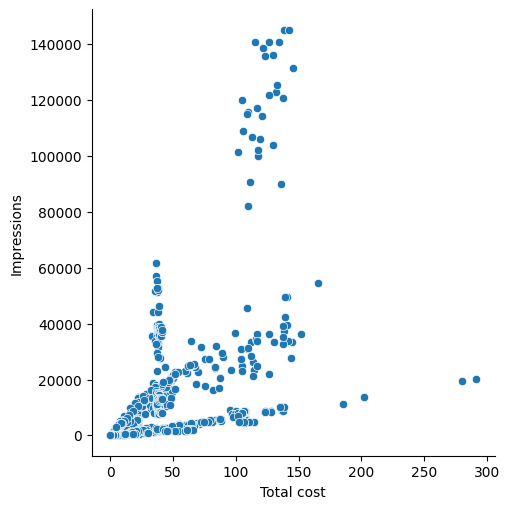

In [25]:
sns.relplot(x='Total cost', y='Impressions', data=df_expl, kind='scatter')

1.2. 2021 & 2022

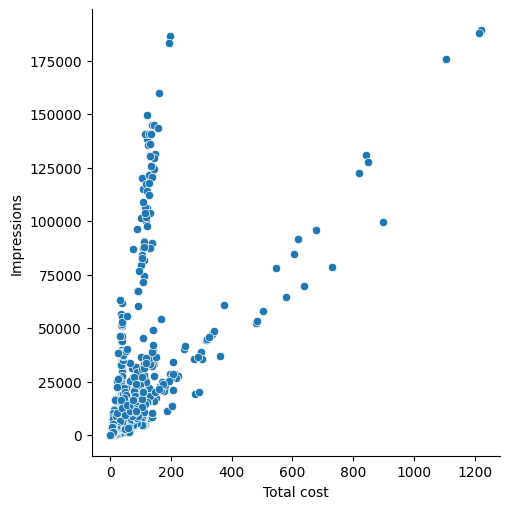

In [26]:
sns.relplot(x='Total cost', y='Impressions', data=df_concat_expl, kind='scatter')

1.2 Spending v impression with location

sns.relplot(x='Total cost', y='Impressions', data=df_expl, hue='geography_campaign', kind='scatter')

sns.relplot(x='Total cost', y='Impressions', data=df_expl, hue='objective', kind='scatter')

sns.relplot(x='Total cost', y='Impressions', data=df_expl, hue='model_campaign', kind='scatter')

## 2. Spend vs clicks

2.1. 2022

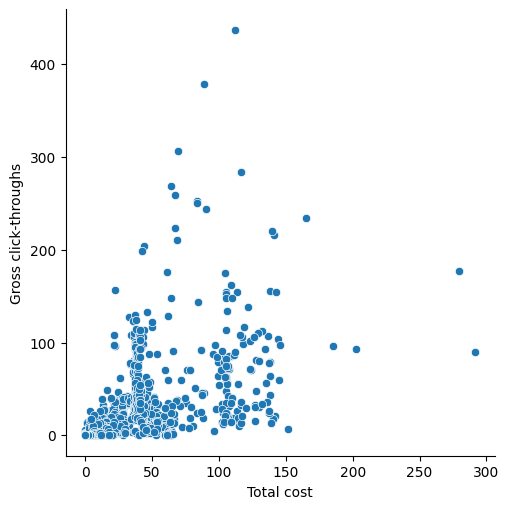

In [27]:
sns.relplot(x='Total cost', y='Gross click-throughs', data=df_expl, kind='scatter')

2.2. 2021 & 2022

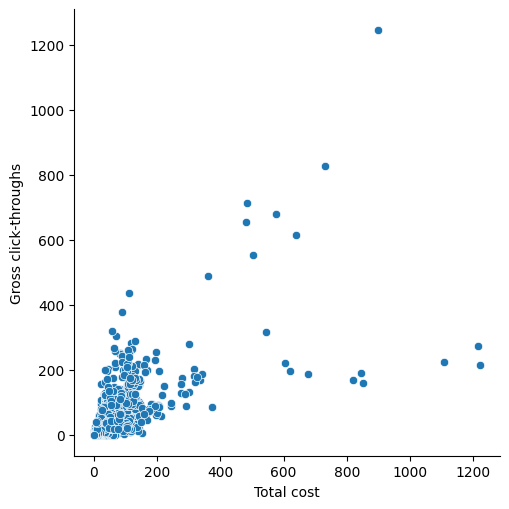

In [28]:
sns.relplot(x='Total cost', y='Gross click-throughs', data=df_concat_expl, kind='scatter')

sns.relplot(x='Total cost', y='Video click', hue='geography_campaign', data=df_expl, kind='scatter')

sns.relplot(x='Total cost', y='Video click', hue='objective', data=df_expl, kind='scatter')

sns.relplot(x='Total cost', y='Video click', hue='model_campaign', data=df_expl, kind='scatter')

## Correlation

df_dummies_campaign = pd.get_dummies(df_expl['model_campaign'])
df_expl = pd.concat([df_expl, df_dummies_campaign], axis=1)
df_expl

df_dummies_area = pd.get_dummies(df_expl['geography_campaign'])
df_expl = pd.concat([df_expl, df_dummies_area], axis=1)
df_expl

df_dummies_objective = pd.get_dummies(df_expl['objective'])
df_expl = pd.concat([df_expl, df_dummies_objective], axis=1)
df_expl

df_expl=df_expl.drop(columns=['model_campaign', 'geography_campaign', 'objective'])

df_expl=df_expl.drop(columns=['Lead'])

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_63083/1022371241.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_expl.corr()


NameError: name 'k' is not defined

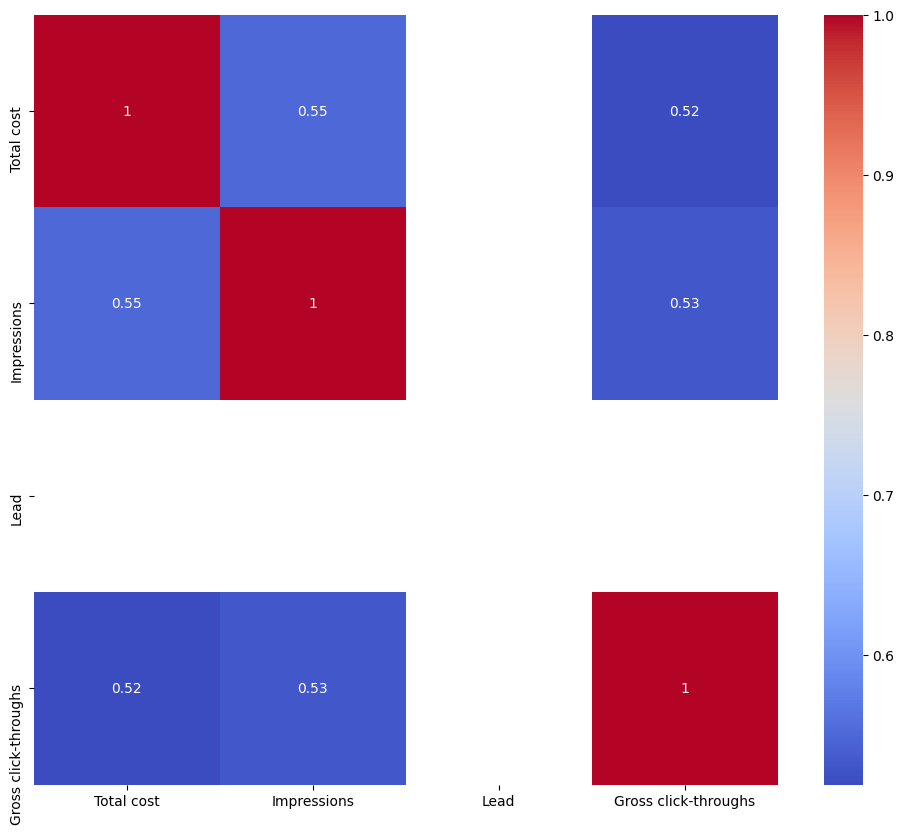

In [29]:
correlation_matrix = df_expl.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Top {} Features)'.format(k))
plt.show()
#High correlations: VIP, CryoSleep, Destination

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_63083/3794301204.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_concat_expl.corr()


NameError: name 'k' is not defined

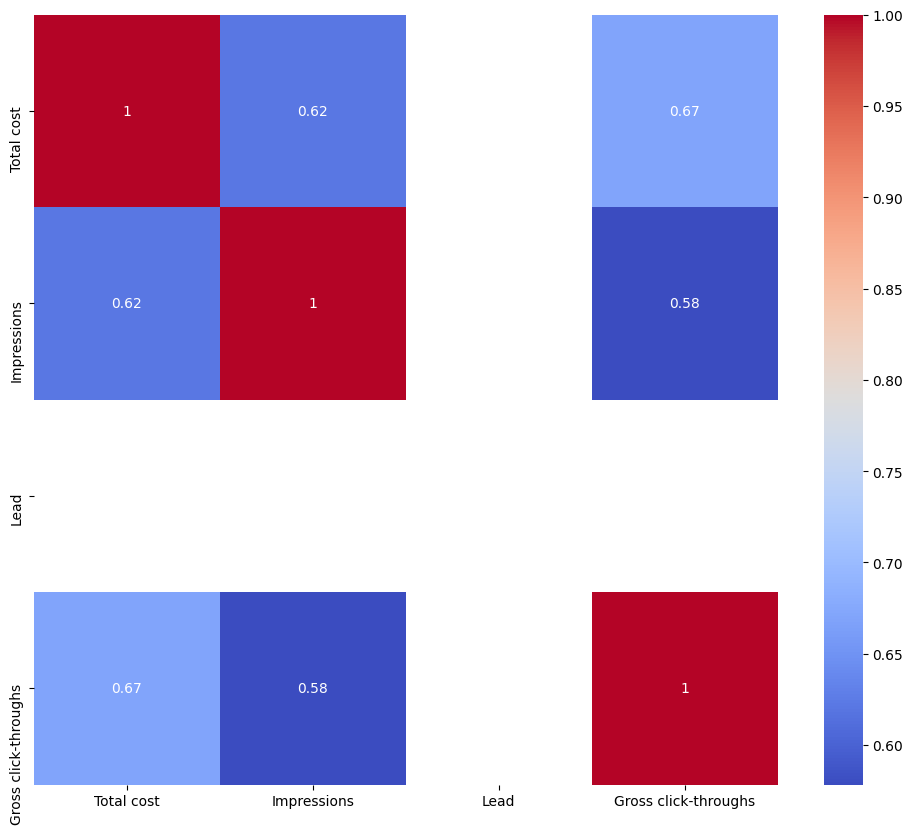

In [30]:
correlation_matrix = df_concat_expl.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap (Top {} Features)'.format(k))
plt.show()
#High correlations: VIP, CryoSleep, Destination

## Plot throughout the year

In [31]:
import pandas as pd

In [32]:
df_expl.rename(columns={'Date':'date', 'Total cost': 'spend_amazon', 'Gross click-throughs': 'clicks', 'Impressions':'impressions', 'Lead':'leads'}, inplace=True)


# Group the data by week and calculate the sum of the ad metrics
df_expl_weekly = df_expl.groupby(pd.Grouper(key='date', freq='W-SUN')).sum()

# Reset the index to get the 'week' column
df_expl_weekly = df_expl_weekly.reset_index()

# Rename the 'date' column to 'week'
df_expl_weekly = df_expl_weekly.rename(columns={'date': 'week_end'})

# Add a 'week_number' column ranging from 1 to 52
df_expl_weekly['week_number'] = df_expl_weekly['week_end'].dt.week

# Display the transformed weekly dataset
df_expl_weekly

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_63083/3268273161.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_expl_weekly['week_number'] = df_expl_weekly['week_end'].dt.week


,week_end,spend_amazon,impressions,leads,clicks,week_number
0,2022-04-03,221.196016,32024,0,208,13
1,2022-04-10,2097.669431,452785,0,1702,14
2,2022-04-17,2195.692112,506144,0,1108,15
3,2022-04-24,2214.022431,535634,0,639,16
4,2022-05-01,1967.792967,503002,0,707,17
5,2022-05-08,1403.046202,299793,0,1018,18
6,2022-05-15,3433.307954,766374,0,4079,19
7,2022-05-22,3342.300112,777398,0,4131,20
8,2022-05-29,2146.962599,476512,0,2151,21
9,2022-06-05,438.556256,110657,0,428,22


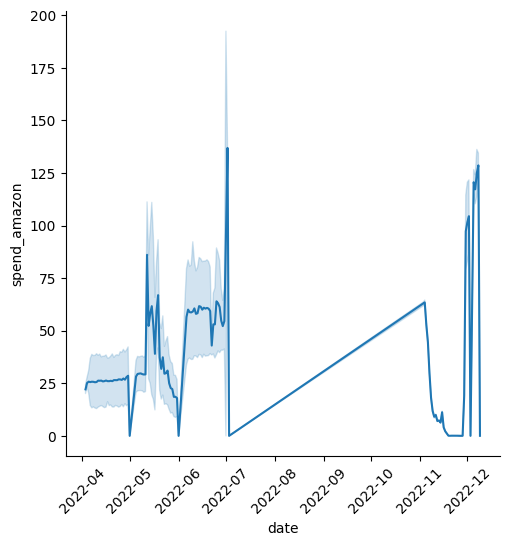

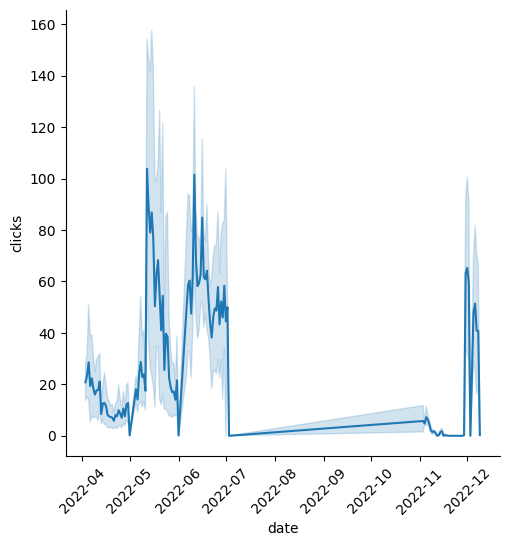

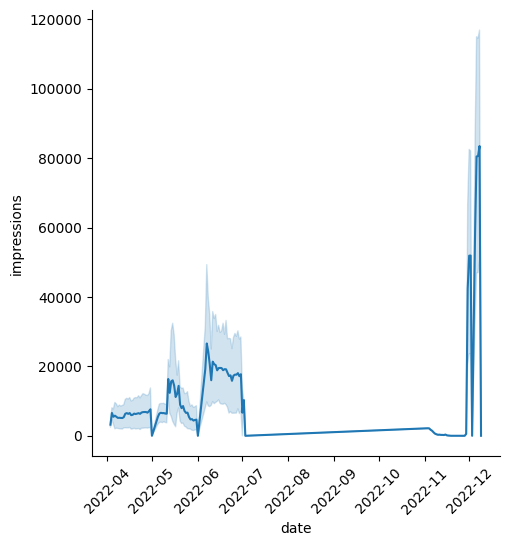

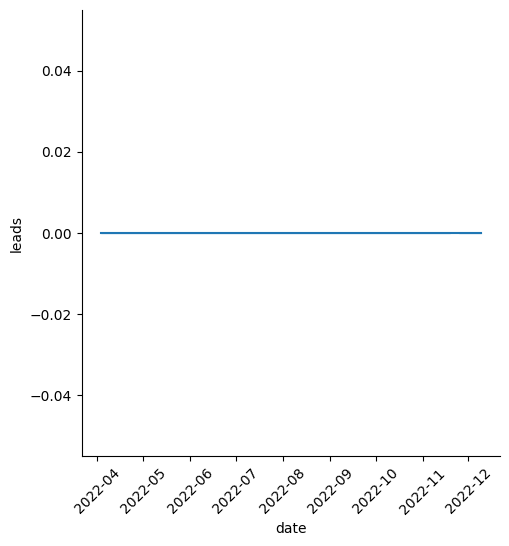

In [33]:
columns=['spend_amazon', 'clicks', 'impressions', 'leads']

for c in columns:
    sns.relplot(x='date', y=c, data=df_expl, kind='line')
    plt.xticks(rotation=45)
    plt.show()

Straight line for month with no spend: just an estimate --> but in reality all values during that time period are equal to zero!

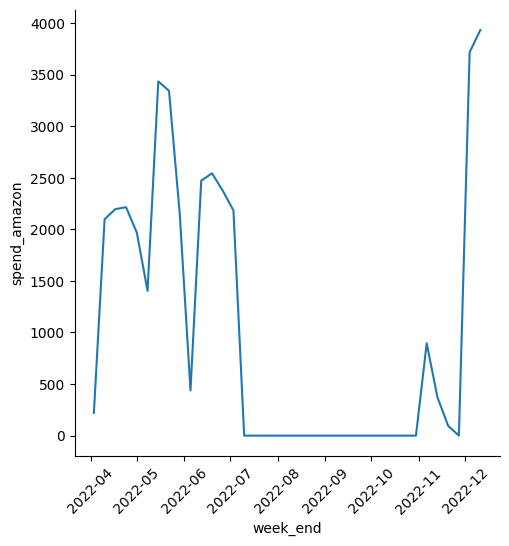

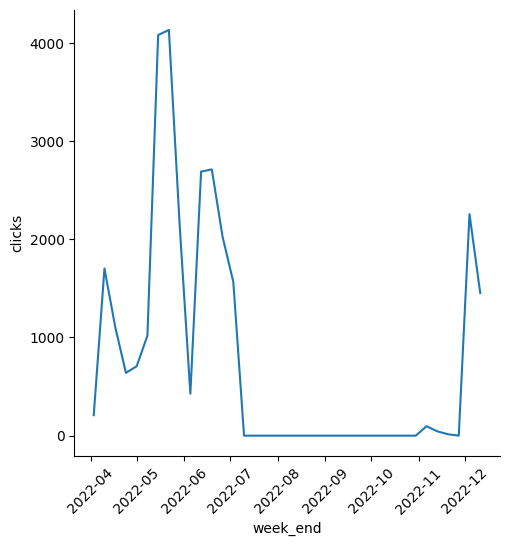

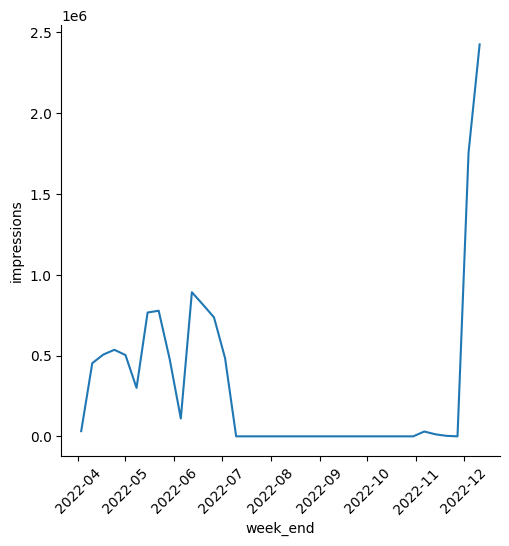

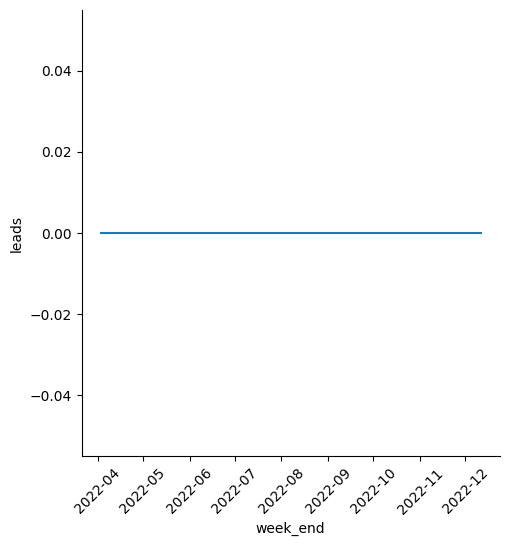

In [34]:
columns=['spend_amazon', 'clicks', 'impressions', 'leads']

for c in columns:
    sns.relplot(x='week_end', y=c, data=df_expl_weekly, kind='line')
    plt.xticks(rotation=45)
    plt.show()

In [35]:
# Group the data by week and calculate the sum of the ad metrics
df_concat_expl_weekly = df_concat_expl.groupby(pd.Grouper(key='Date', freq='W-SUN')).sum()

# Reset the index to get the 'week' column
df_concat_expl_weekly = df_concat_expl_weekly.reset_index()

# Rename the 'date' column to 'week'
df_concat_expl_weekly = df_concat_expl_weekly.rename(columns={'Date': 'week_end'})

# Add a 'week_number' column ranging from 1 to 52
df_concat_expl_weekly['week_number'] = df_concat_expl_weekly['week_end'].dt.week

# Display the transformed weekly dataset
df_concat_expl_weekly

/var/folders/p5/9npcw21d3xs054yxn9xh232h0000gn/T/ipykernel_63083/33114266.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_concat_expl_weekly['week_number'] = df_concat_expl_weekly['week_end'].dt.week


,week_end,Total cost,Impressions,Lead,Gross click-throughs,week_number
0,2021-05-02,167.695613,19688,0,165,17
1,2021-05-09,1762.249346,212148,0,1428,18
2,2021-05-16,6805.032698,962368,0,4451,19
3,2021-05-23,7305.057684,929533,0,6961,20
4,2021-05-30,0.048529,6,0,0,21
...,...,...,...,...,...,...
80,2022-11-13,372.059711,12589,0,44,45
81,2022-11-20,94.884302,3069,0,14,46
82,2022-11-27,0.396292,15,0,0,47
83,2022-12-04,3716.407063,1757197,0,2256,48


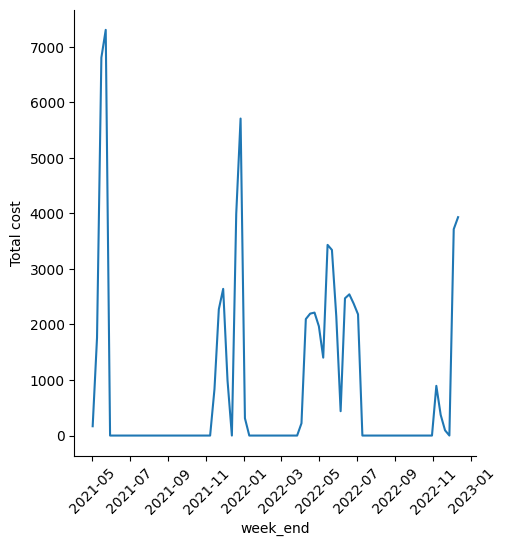

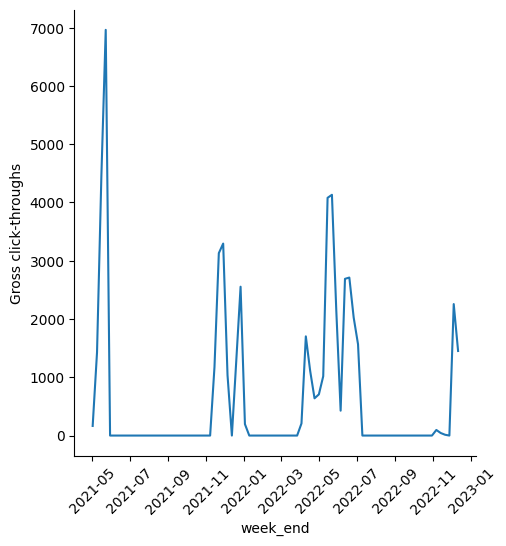

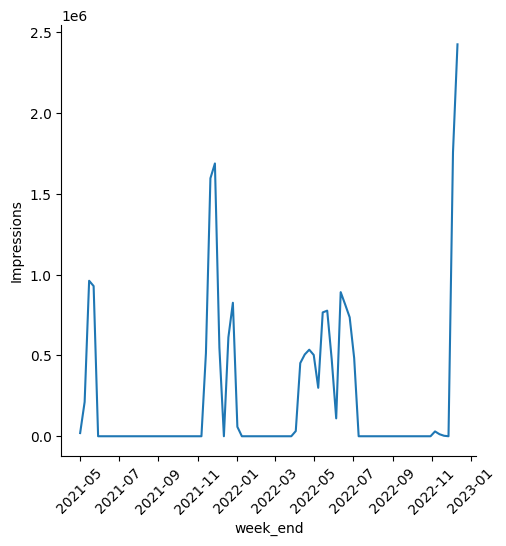

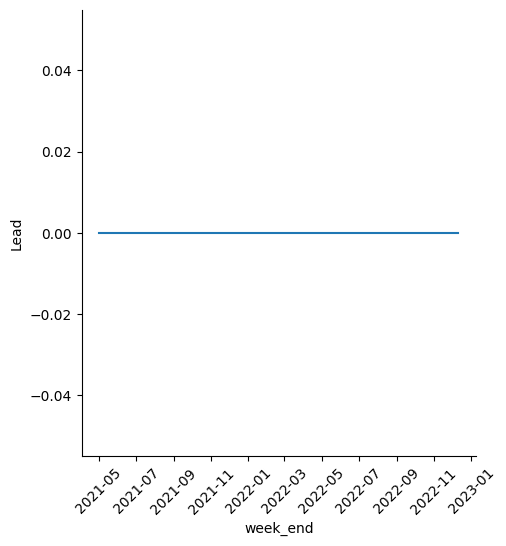

In [36]:
columns=['Total cost', 'Gross click-throughs', 'Impressions', 'Lead']

for c in columns:
    sns.relplot(x='week_end', y=c, data=df_concat_expl_weekly, kind='line')
    plt.xticks(rotation=45)
    plt.show()

## Formatting the final dataset

In [37]:
df_final= df_concat_expl_weekly.rename(columns={'Impressions':'impressions_amazon', 'Total cost': 'spend_amazon', 'Gross click-throughs': 'clicks_amazon', 'Lead': 'leads_amazon'})
df_final
df_final.to_csv('amazon_final.csv')

In [38]:
df_final

,week_end,spend_amazon,impressions_amazon,leads_amazon,clicks_amazon,week_number
0,2021-05-02,167.695613,19688,0,165,17
1,2021-05-09,1762.249346,212148,0,1428,18
2,2021-05-16,6805.032698,962368,0,4451,19
3,2021-05-23,7305.057684,929533,0,6961,20
4,2021-05-30,0.048529,6,0,0,21
...,...,...,...,...,...,...
80,2022-11-13,372.059711,12589,0,44,45
81,2022-11-20,94.884302,3069,0,14,46
82,2022-11-27,0.396292,15,0,0,47
83,2022-12-04,3716.407063,1757197,0,2256,48
